## [作業重點]
目前你應該已經要很清楚資料集中，資料的型態是什麼樣子囉！包含特徵 (features) 與標籤 (labels)。因此要記得未來不管什麼專案，必須要把資料清理成相同的格式，才能送進模型訓練。
今天的作業開始踏入決策樹這個非常重要的模型，請務必確保你理解模型中每個超參數的意思，並試著調整看看，對最終預測結果的影響為何

## 作業

1. 試著調整 DecisionTreeClassifier(...) 中的參數，並觀察是否會改變結果？
2. 改用其他資料集 (boston, wine)，並與回歸模型的結果進行比較

In [31]:
# 匯入套件
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [32]:
# 匯入資料

from sklearn.datasets import load_boston
boston = load_boston()
X = boston.data
y = boston.target
features = boston.feature_names
X.shape

(506, 13)

In [33]:
X = pd.DataFrame(X, columns=features)

In [34]:
# 切分資料

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)


In [35]:
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
172,0.13914,0.0,4.05,0.0,0.510,5.572,88.5,2.5961,5.0,296.0,16.6,396.90,14.69
80,0.04113,25.0,4.86,0.0,0.426,6.727,33.5,5.4007,4.0,281.0,19.0,396.90,5.29
46,0.18836,0.0,6.91,0.0,0.448,5.786,33.3,5.1004,3.0,233.0,17.9,396.90,14.15
318,0.40202,0.0,9.90,0.0,0.544,6.382,67.2,3.5325,4.0,304.0,18.4,395.21,10.36


In [36]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 379 entries, 502 to 37
Data columns (total 13 columns):
CRIM       379 non-null float64
ZN         379 non-null float64
INDUS      379 non-null float64
CHAS       379 non-null float64
NOX        379 non-null float64
RM         379 non-null float64
AGE        379 non-null float64
DIS        379 non-null float64
RAD        379 non-null float64
TAX        379 non-null float64
PTRATIO    379 non-null float64
B          379 non-null float64
LSTAT      379 non-null float64
dtypes: float64(13)
memory usage: 41.5 KB


In [37]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,379.0,3.805183,9.375846,0.00632,0.083475,0.24522,3.68339,88.9762
ZN,379.0,11.521108,23.492644,0.00000,0.000000,0.00000,17.75000,100.0000
INDUS,379.0,11.220053,6.875362,0.46000,5.255000,9.69000,18.10000,27.7400
CHAS,379.0,0.081794,0.274413,0.00000,0.000000,0.00000,0.00000,1.0000
NOX,379.0,0.554073,0.117825,0.38500,0.447500,0.53800,0.62400,0.8710
RM,379.0,6.255726,0.687415,3.56100,5.875000,6.17200,6.61100,8.7800
AGE,379.0,68.751451,28.276504,6.00000,45.050000,79.20000,94.05000,100.0000
DIS,379.0,3.824433,2.138449,1.12960,2.094450,3.31750,5.10855,12.1265
RAD,379.0,9.525066,8.734550,1.00000,4.000000,5.00000,24.00000,24.0000
TAX,379.0,405.182058,169.483657,187.00000,277.000000,329.00000,666.00000,711.0000


In [38]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

In [39]:
def get_the_best_model_and_performance(model, params, X, y):
    grid = GridSearchCV(model, params, error_score=0.)
    grid.fit(X, y)
    print('Best Performance:{}'.format(grid.best_score_))
    print('The parameters of best performance:{}'.format(grid.best_params_))
    print('Average time to fit(s):{}'.format(round(grid.cv_results_['mean_fit_time'].mean(), 3)))
    print('Average time to predict(s):{}'.format(round(grid.cv_results_['mean_score_time'].mean(), 3)))
    

In [40]:
clf = DecisionTreeRegressor()
params = {'criterion':['mse', 'friedman_mse', 'mae'],
         'max_depth':[None, 1, 3, 5, 7, 9, 11],
         'min_samples_leaf':[3, 5, 7, 9, 11],
         'splitter':['best', 'random']}

In [41]:
get_the_best_model_and_performance(clf, params, X_train, y_train)

d:\code\python\claraneko\venv\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best Performance:0.7320795174862316
The parameters of best performance:{'criterion': 'mse', 'max_depth': None, 'min_samples_leaf': 11, 'splitter': 'best'}
Average time to fit(s):0.002
Average time to predict(s):0.001


d:\code\python\claraneko\venv\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


## 結果
在利用網格搜尋的方式來找到表現最佳的超參數為
'criterion': 'mse', 'max_depth': None, 'min_samples_leaf': 11

經過validation後，其R^2 = 0.732

### 視覺化樹模型

1. 使用Matplotlib將決策樹視覺化:tree.plot_tree()
2. 使用Graphviz將決策樹視覺化:
    1. 需要建立一個dot檔案來描述決策樹
    2. 使用Graphviz將dot檔案轉換為圖形檔案

In [42]:
# 視覺化結果: 
from sklearn.metrics import r2_score, mean_squared_error
clf = DecisionTreeRegressor(criterion='mse', max_depth=None, min_samples_leaf=11, splitter='best', random_state=1)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print('R_square:{}'.format(r2_score(y_test, pred)))
print('MSE:{}'.format(mean_squared_error(y_test, pred)))

R_square:0.8389663588318896
MSE:15.951746685430164


In [51]:
from sklearn import tree
fig, axes = plt.subplots(ncols=1, nrows=1, figsize=(30,30), dpi=400)
tree.plot_tree(clf, feature_names=boston.feature_names, filled=True, rounded=True, precision=3, fontsize=10)
fig.savefig(r'D:\成大\資料科學\第四屆百日馬拉松\boston_tree_vis.png')

In [52]:
# 使用tree.export_graphviz()
from sklearn import tree
tree.export_graphviz(clf, out_file=r'D:\成大\資料科學\第四屆百日馬拉松\boston_tree.dot', feature_names=boston.feature_names, filled=True, rounded=True, precision=3)

參考:https://www.mdeditor.tw/pl/pHpr/zh-tw

## 超參數的理解

1. criterion:評估群內資料的相似程度之metric
    * 在分類任務中(DecisionTreeClassifier):
    * 在回歸任務中(DecisionTreeRegressor):
2. splitter:控制決策樹的隨機性
3. 剪枝方式
    * max_depth:限制樹的最大長成深度
    * min_samples_leaf:一個節點在分枝後每個子節點都必須包含至少min_samples_leaf個訓練樣本(搭配max_depth一起使用)
    * min_samples_split:一個中間節點必須包含至少min_samples_split個訓練樣本，這個節點在允許被分枝，否則分枝不會發生

# 調整其他超參數(分類任務)

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
# 讀取鳶尾花資料集
iris = load_iris()

# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.25, random_state=4)

# 建立模型
clf = DecisionTreeClassifier()

# 參數
params = {'criterion':['gini', 'entropy'],
         'max_depth':[None, 1, 3, 5, 7, 9, 11],
         'min_samples_leaf':[3, 5, 7, 9, 11],
         'splitter':['best', 'random']}

In [13]:
get_the_best_model_and_performance(clf, params, x_train, y_train)

d:\code\python\claraneko\venv\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best Performance:0.9821428571428571
The parameters of best performance:{'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 3, 'splitter': 'best'}
Average time to fit(s):0.0
Average time to predict(s):0.0


d:\code\python\claraneko\venv\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


利用網格搜尋後的最佳超參數為
{'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 3, 'splitter': 'best'}

經過validation後，能得到Acurracy=0.982，比原先的0.974還要好一點


In [14]:
from sklearn.metrics import accuracy_score, classification_report

In [15]:
clf_fine_tune = DecisionTreeClassifier(criterion='gini', max_depth=None, 
                                       min_samples_leaf=3, splitter='best')
clf_fine_tune.fit(x_train, y_train)
pred_result = clf_fine_tune.predict(x_test)
print('Accuracy of the test:{}'.format(accuracy_score(y_test, pred_result)))
print('Classification_report:{}'.format(classification_report(y_test, pred_result)))

Accuracy of the test:0.9736842105263158
Classification_report:              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      0.88      0.93         8
           2       0.92      1.00      0.96        12

    accuracy                           0.97        38
   macro avg       0.97      0.96      0.96        38
weighted avg       0.98      0.97      0.97        38



但以測試集下去測試，其Acurracy還是依舊為0.974

In [16]:
# 得知各特徵的特徵重要性
clf_fine_tune.feature_importances_

array([0.00882094, 0.        , 0.06348814, 0.92769091])

In [21]:
# 視覺化:export_graphviz函數
from sklearn.tree import export_graphviz
from sklearn import tree
import pydot
from sklearn.externals.six import StringIO
dot_data = StringIO()
export_graphviz(clf_fine_tune, out_file=dot_data, feature_names=iris.feature_names)

(graph,) = pydot.graph_from_dot_file(dot_data.getvalue())
graph.write_png('D:\成大\資料科學\第四屆百日馬拉松\tree.png')
# graph.write_pdf("D:\成大\資料科學\第四屆百日馬拉松\iris_tree.pdf")

OSError: [Errno 22] Invalid argument: 'digraph Tree {\nnode [shape=box] ;\n0 [label="petal width (cm) <= 0.8\\ngini = 0.663\\nsamples = 112\\nvalue = [32, 42, 38]"] ;\n1 [label="gini = 0.0\\nsamples = 32\\nvalue = [32, 0, 0]"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="petal width (cm) <= 1.75\\ngini = 0.499\\nsamples = 80\\nvalue = [0, 42, 38]"] ;\n0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n3 [label="petal length (cm) <= 4.95\\ngini = 0.162\\nsamples = 45\\nvalue = [0, 41, 4]"] ;\n2 -> 3 ;\n4 [label="sepal length (cm) <= 5.15\\ngini = 0.048\\nsamples = 41\\nvalue = [0, 40, 1]"] ;\n3 -> 4 ;\n5 [label="gini = 0.444\\nsamples = 3\\nvalue = [0, 2, 1]"] ;\n4 -> 5 ;\n6 [label="gini = 0.0\\nsamples = 38\\nvalue = [0, 38, 0]"] ;\n4 -> 6 ;\n7 [label="gini = 0.375\\nsamples = 4\\nvalue = [0, 1, 3]"] ;\n3 -> 7 ;\n8 [label="petal length (cm) <= 4.85\\ngini = 0.056\\nsamples = 35\\nvalue = [0, 1, 34]"] ;\n2 -> 8 ;\n9 [label="gini = 0.444\\nsamples = 3\\nvalue = [0, 1, 2]"] ;\n8 -> 9 ;\n10 [label="gini = 0.0\\nsamples = 32\\nvalue = [0, 0, 32]"] ;\n8 -> 10 ;\n}'

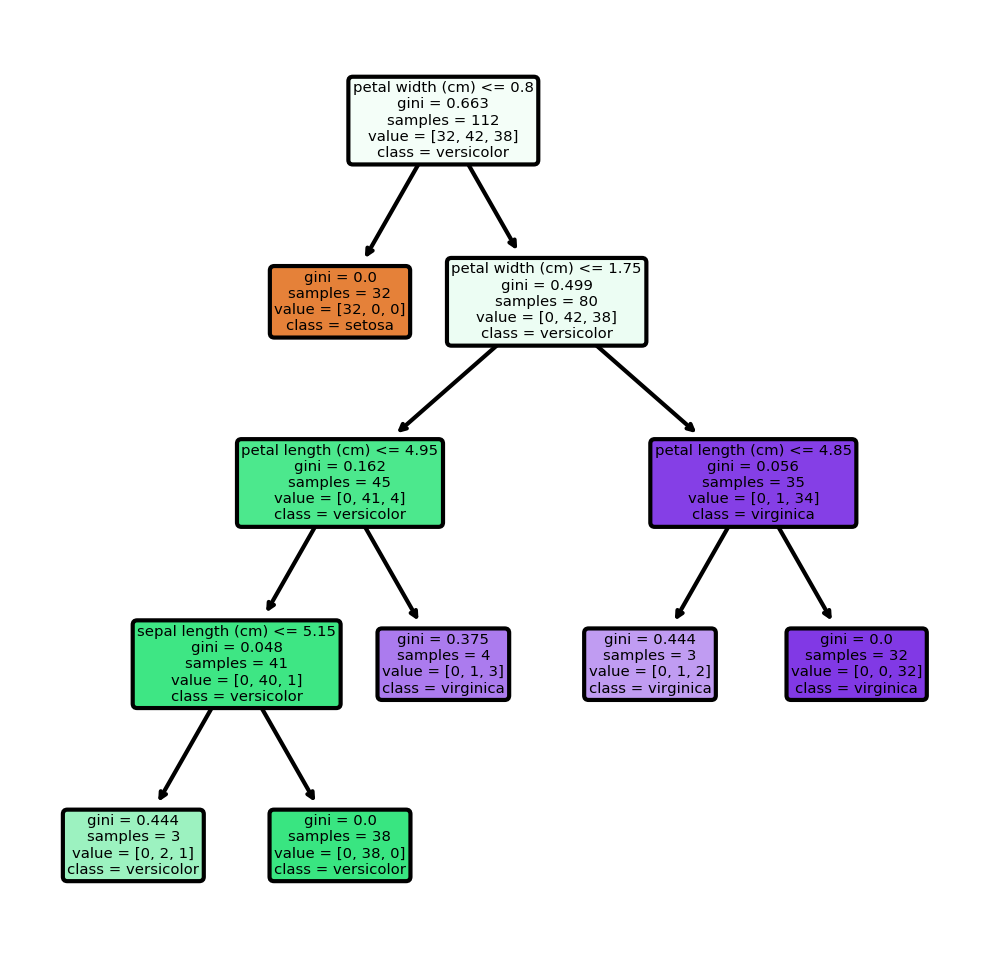

In [29]:
# 運用tree.plot_tree()來視覺化
# 參考:https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html

from sklearn import tree
# 若要匯出圖片，先建立figure
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4,4), dpi=300)
# 運用tree.plot_tree()來視覺化
tree.plot_tree(clf_fine_tune, feature_names=iris.feature_names, class_names=iris.target_names, rounded=True, precision=3, filled=True)
# 儲存圖片
fig.savefig('D:\\成大\\資料科學\\第四屆百日馬拉松\\tree_vis.png')

In [28]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [43]:
clf_change = DecisionTreeClassifier(criterion='gini', max_depth=1, 
                                       min_samples_leaf=3, splitter='best')
clf_change.fit(x_train, y_train)
pred_result = clf_change.predict(x_test)
print('Accuracy of the test:{}'.format(accuracy_score(y_test, pred_result)))
print('Classification_report:{}'.format(classification_report(y_test, pred_result)))

Accuracy of the test:0.6842105263157895
Classification_report:              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.40      1.00      0.57         8
           2       0.00      0.00      0.00        12

    accuracy                           0.68        38
   macro avg       0.47      0.67      0.52        38
weighted avg       0.56      0.68      0.59        38



d:\code\python\claraneko\venv\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


若max_depth限縮到1，則剪枝效果就會加強，模型會變得很簡單，所以在測試集之Acurracy就往下降到0.684